# Introduction to Propagation of Uncertainties

### Goals:

1. To understand what we mean by "propogation of uncertainties" and why it is important.
2. To understand the equations governing propogation of uncertainties.
3. To apply those equations to a simple example, wherein we devise a really poor method of measuring the area of a table.

### Timing

1. Try to finish this notebook in 30-35 minutes

### Question and Answer Template

You can go to the link below, and do "file" -> "make a copy" to make yourself a google doc that you can use to fill in the answers to the question in this weeks notebooks.

https://docs.google.com/document/d/1O0H_GG1vkNId-FKQFQROkv5mlx9gWCzq5LiT4oYLOhI/edit?usp=drive_link

In [6]:
## You could also try using the 'widget' backend instead of inline
## which is a bit more interactive, but also less reliable
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 14

### Some functions we will use in this module

| Function Name            | What it does |
| - | - |
|    rng.normal   | generates a random real number for a "Gaussian" or "Normal" distribution |


### Scientific Context

Recall this figure illustrating Hubble's Law:

<img src="figures/hubble_constant_far.jpg" width="40%"/>

You may have noticed that each data point has horizontal error bars, indicating the uncertainty in distance, but no error bars for the velocity. 

The reason for this is that the velocity of distant objects can be measured quite accurately. This is done by measuring the "redshift" -- the increase in wavelength of the observed light from a source moving away from us. Modern sensors can measure these wavelength shifts with high resolution, leading to very small uncertainties in velocity (too small to show up on this plot!)

### The cosmic distance ladder

Distances, on the other hand, are much harder to measure. As you can see in the Hubble plot, the uncertainties in measured distances can be large, and they tend to get larger as we look at more distant objects. 

The problem is that there is no single technique that can measure distances at all these different scales. Astronomers estimate distances mainly by using "standard candles," which are objects that have a known luminosity. The distance of these objects can be inferred from the brightness that we observe on Earth.

The difficulty with this method is that different types of standard candles are needed at different distance scales. Measuring a very distant object depends on accurately calibrating the standard candles at all the length scales in between! This is why the technique is called the "distance ladder" -- every time you go up a rung (distance scale) on the ladder, you have to calibrate using measurements from the previous rung. 

Some of the various techniques and standard candles used by astronomers are shown in the figure below. You can imagine how small uncertainties can start to add up as you go farther up the ladder. This is the idea we'll be exploring in this notebook.

<img src="figures/distance_ladder.png" width="50%"/>

*By WilliamKF, TilmannR - File:Extragalactic_Distance_Ladder.svg, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=69259966*


### How not to measure the area of your desk or table

Let's imagine that you need to estimate the area of the desk or table you are working at, but you don't have a ruler or other measuring device. Instead, by way of analogy to the cosmic distance ladder, you'll estimate the dimensions of some smaller objects, and then use those to calculate the area of the table. We'll assume your table is rectangular.

1. Take a credit card or similar sized object (a phone or pen could also work, for example) from your wallet or bag.
2. Estimate the length of the card, in centimeters. Let's call that $C$.  E.g., I'm using a debit card from my wallet and I estimate $C \approx 8 {\rm cm}$.
3. Find a book, laptop or something else that is a few times longer than the card. Now measure the length of the book in terms of the length of the card.  Let's call that $B$.  E.g. I'm using a Moleskine notebook that was sitting on my desk, and I measured $B \approx 2.5$ cards.
4. Now measure the length and width of the table, using the book. Let's call these $l$ and $w$.  I found the dimensions of my desk to be $w \approx 5.1$ and $l \approx 3.8$ books.
5. Now we do the math and estimate the area of the desk in centimeters. 

The width of the desk in cm is $(w \times B \times C)$, the length in cm is  $(l \times B \times C)$, so the area is

> $A = (w \times B \times C)(l \times B \times C) = w \times l \times B^2 \times C^2$.

### INPUT YOUR OWN measurments into the next cell

The `_m` indicates that these are the quantities that we measured. 

In [7]:
## From our example, C_m = 8., B_m = 2.5, l_m = 3.8, and w_m = 5.1
## Enter your own values below!
C_m = 8
B_m = 4.2
l_m = 1.8
w_m = 2.8

In [8]:
## Let's write a function to compute the area for us, in terms
## of the parameters we've discussed above:
def deskArea(w, l, B, C):
    return w * l * B**2 * C**2

## Let's test our new function in terms of the values we entered:
A_m = deskArea(w_m, l_m, B_m, C_m)
print(f"Area of desk: {A_m:0.0f} cm^2")

Area of desk: 5690 cm^2


Of course, we should expect there to be uncertainty in our measurements, and these uncertainties will have an effect on the final area that we calculate. Let's see how uncertainties in the different factors can affect our final answer.

In [9]:
## What if our estimate of the card size is off by 1 cm?
A_new = deskArea(w_m, l_m, B_m, C_m+1)
print("If C = C_m + 1:")
print(f"    A = {A_new:0.0f} cm^2")
print(f"    A = {(A_new / A_m):0.2f} * A_m\n")

## What if we're 10% off in our measurement of one of the table dimensions?
A_new2 = deskArea(w_m*1.1, l_m, B_m, C_m)
print("If w = 1.1 * w_m:")
print(f"    A = {A_new2:0.0f} cm^2")
print(f"    A = {(A_new2/A_m):0.2f} * A_m")


If C = C_m + 1:
    A = 7201 cm^2
    A = 1.27 * A_m

If w = 1.1 * w_m:
    A = 6259 cm^2
    A = 1.10 * A_m


### Exercise:

##### E.1 Measure the area of your desk with our distance ladder procedure

Compute how much your estimate would change in both absolute and relative terms if:
1. You had `B_m` wrong by 0.5 card lengths.
2. If you had `w_m` wrong by 20\%.

Paste your work (including your values of l_m, w_m, B_m, C_m) into the google doc template. This should include similar computations of `A_new` with our "errors" noted in the above list. 

When writing your own code, it is often useful (and good practice) to include both comments, as well as `print()` statements to explicitly show what you're calculating. It both helps you, and helps others reading your code

### We are actually just re-inventing calculus.

What we are doing is estimating how much the value of a function changes when we change one of the input parameters.  

That is exactly what a partial derivative is.

For example, if we wanted to compute how much $A$ changes if we changed our estimate of $l$, we would get

> $\Delta A_{l} = \frac{\partial A}{\partial l} \times \delta l$

Where $\delta l$ is the change in our estimate of $l$, $\Delta A_{l}$ is the change in $A$ resulting from the change in $l$ and $\frac{\partial A}{\partial l}$ is the partial derivative of $A$ with respect to $l$.

Now here is an interesting point: when we compute the partial derivative of $A$ with respect to $l$, it just pulls a factor of $l$ out.

> $\frac{\partial A}{\partial l} = w B^2 C^2$

So, if compute the relative change in $A$ we see that a lot of things cancel out:

> $\frac{\Delta A_{l}}{A} = \frac{w B^2 C^2 \delta l}{w l B^2 C^2} = \frac{\delta l}{l}$

**This is really not at all a suprising result.  All it is saying is that if your measurement of the length of the desk in terms of books were 10\% higher, then your calculation of the area of the desk would also be 10\% higher.** 

That is a pretty intuitive result by itself.  What we are going to do next is learn how to account for more complicated cases.

### A complication

In the example above, we don't actually know what $\delta l$ (or $\delta w$, $\delta C$ and $\delta B$) are.  They
represent uncertainties.  

However, for the purpose of the exercise, let's assume that $l \pm \delta l = l_{m} \pm 0.10 l_{m}$, i.e. there is a 10\% uncertainty on our measurement which will cover most possible measurements of $l$, and help us see the effect on $A$.

We are going to use capital $\Delta$, e.g., $\Delta l$ and $\Delta A$ to refer to the changes with respect to the original that we see in specific trials, and lowercase $\delta$, e.g., $\delta l$ and $\delta A$ to refer to the uncertainties we assign to quantities.  

So, we use $l \pm \delta l$ to define a distribution of values of $l_{\rm sim}$ which we then use to compute $\Delta l = l_{\rm sim} - l_{m}$.  

#### Simulating a bunch of measurements of l

We are going to be simulating 10000 measurements, drawn from a normal distribution centered at $l_m$ and with a width of $0.1*l_m$.  

This corresponds to an uncertainty of 10% on the measurement of $l$, i.e., $\delta l/l = 0.10$.

In [10]:
## Instantiate a random number generator with a fixed seed for
## later reproducibility. 
rng = np.random.default_rng(42)

In [11]:
## Using the random number generator from above, sample 10000 times
## from a normal distribution. The 'loc' argument is the mean of the
## distribution and the 'scale' argument is the standard deviation.
l_sim = rng.normal(loc=l_m, scale=0.1*l_m, size=10000)

#### Then we plot them

First as distribution of the simulated values (in the next cell).

Then as a distribution of the relative change with respect to the orginal or central value (two cells down). 

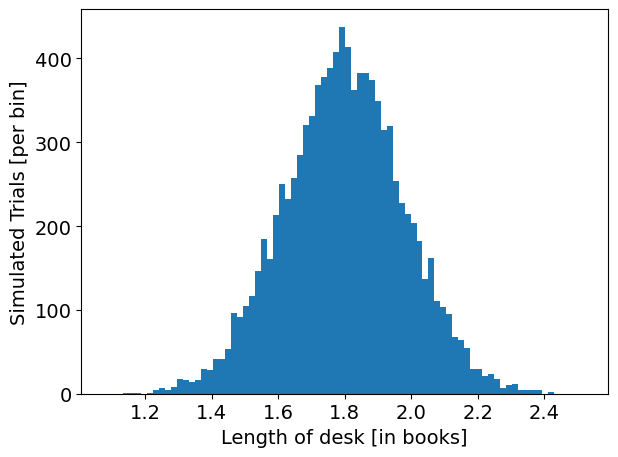

In [12]:
## Plot a histogram of the distribution of simulated lengths,
## just to get an idea of what our data looks like (a good habit)
plt.hist(l_sim, bins=np.linspace(0.6*l_m, 1.4*l_m, 81))
plt.xlabel("Length of desk [in books]")
plt.ylabel("Simulated Trials [per bin]")
plt.tight_layout()
plt.show()

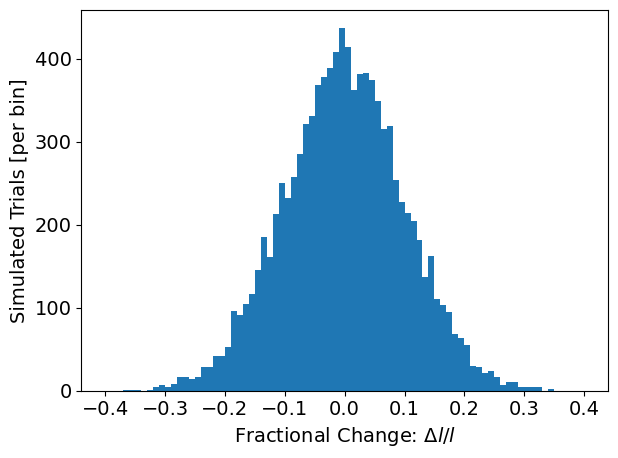

Fractional Change: ± 0.10


In [13]:
## Plot a histogram of the relative change in length of our
## simulated measurements, as compared to the measured value
## that we started with. 
plt.hist((l_sim/l_m)-1, bins=np.linspace(-0.4, 0.4, 81))
plt.xlabel(r'Fractional Change: $\Delta l / l$')
plt.ylabel("Simulated Trials [per bin]")
plt.tight_layout()
plt.show()

## We should know this fractional change since we generated
## this data ourselves, but let's compute it to verify.
print(f"Fractional Change: ± {np.std((l_sim/l_m)-1):0.2f}") 

# Effect on Area measurement

Now we are going to compute the distribution of measurements of the area $A$ we would get from those measurements of $l$.

### Case 1, effect of uncertainty in l on area

Here we are just using the l_sim values we plotted above to simulate what would happen if we measured different values of l. 

In [14]:
## Here we are going to compute the resulting relative change 
## in A given the simulated values of l that we just generated.
## First we compute the area itself
A_sim_1 = deskArea(w_m, l_sim, B_m, C_m)

## Then we compute the relative change in A
dA_over_A_sim_1 = (A_sim_1 - A_m)/A_m

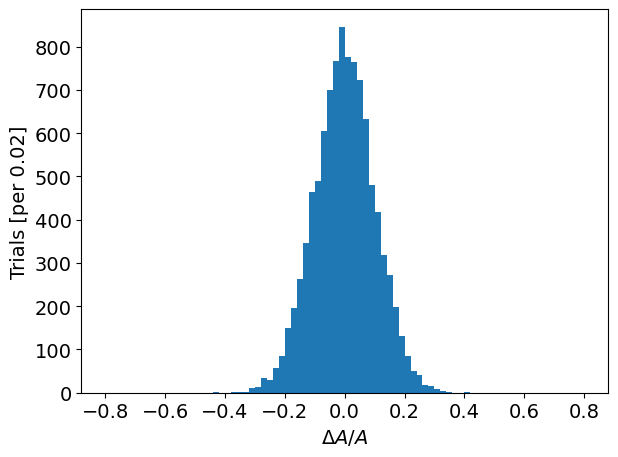

Fractional Change: ± 0.10


In [15]:
## Now plot all that data with some specific bin spacing
plt.hist(dA_over_A_sim_1, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.tight_layout()
plt.show()

## Compute the fractional change from our simulated areas.
print(f"Fractional Change: ± {np.std(dA_over_A_sim_1):0.2f}")

### Case 2, effect of uncertainty in C on area

In this case we are going to simulate what happens if we had used a different value of C, the length of the card we used to measure the book.

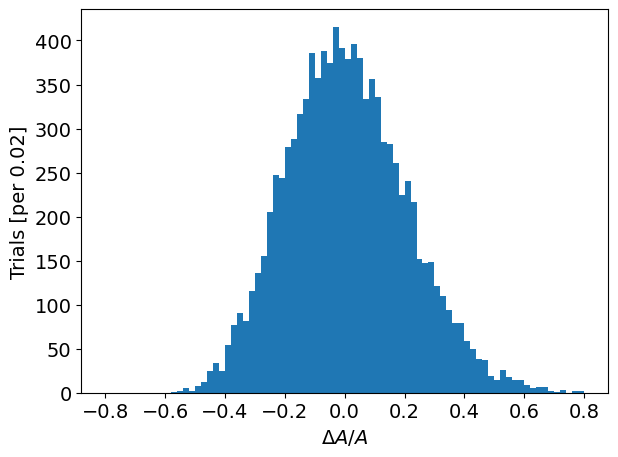

Fractional Change: ± 0.20


In [16]:
## Generate some simulated scaling constants C, with 10%
## standard deviation and a central value consistent with
## what we measured, i.e. C_m.
C_sim = np.random.normal(loc=C_m, scale=0.1*C_m, size=10000)

## Compute some areas using the simulated scaling factors
A_sim_2 = deskArea(w_m, l_m, B_m, C_sim)

## Calculate the relative change in area
dA_over_A_sim_2 = (A_sim_2 - A_m)/A_m

## Plot a histogram of the relative change in area
plt.hist(dA_over_A_sim_2, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.tight_layout()
plt.show()

print(f"Fractional Change: ± {np.std(dA_over_A_sim_2):0.2f}")

### Case 3, effect of combined uncertainty in l and w on area

In this case we are going to simulate what happens if we had found different values of both l and w, ie., the length and width of the desk, as measured in books.

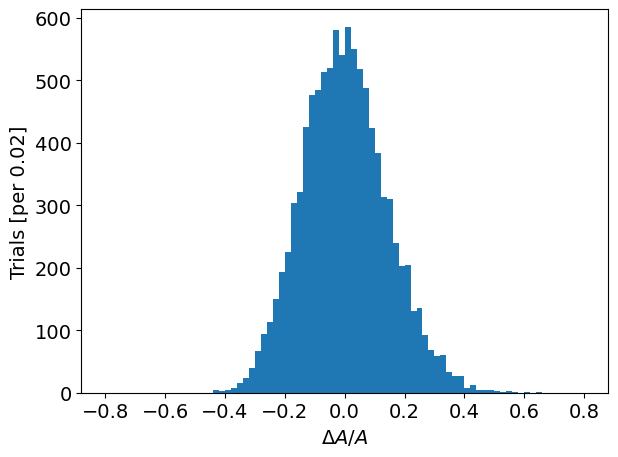

Fractional Change: ± 0.14


In [17]:
## Generate some simulated widths centered around our measured value
## with a 10% standard deviation
w_sim = rng.normal(loc=w_m, scale=0.1*w_m, size=10000)

## Compute some areas using both the simulated variable widths, as 
## well as the simulated variable lengths from before
A_sim_3 = deskArea(w_sim, l_sim, B_m, C_m)

## Calculate the relative change in area
dA_over_A_sim_3 = (A_sim_3 - A_m)/A_m

## Plot a histogram of the relative change in area
plt.hist(dA_over_A_sim_3, bins=np.linspace(-0.8, 0.8, 81))
plt.xlabel(r'$\Delta A / A$')
plt.ylabel(r'Trials [per 0.02]')
plt.tight_layout()
plt.show()

print(f"Fractional Change: ± {np.std(dA_over_A_sim_3):0.2f}")

### Mathematical formulas

For now, and for the next few weeks we are going to assume that the variables we are measuring are all independent of each other.  E.g. our measurement of $w$ did not somehow depend on $l$. For this particular example, that is almost certainly true. 

In general, for a quantity $f(x_i)$ that is a function of **_independent_** variables $x_i$, each of which has uncertainty $\delta x_i$, the variance of $f$ is given by:
$$
\sigma_f^{2}(x_i) = \sum_i \left(\frac{\partial f}{\partial x_i} \delta x_i\right)^2
$$
where each partial derivative is evaluated at the mean values of $x_i$.

In our case, $f = A$ is the area of the desk, and the $x_i$ are the things we measured, namely: $w$, $l$, $B$, and $C$.  
Therefore, 

> $\sigma_A^2 = \left(\frac{\partial A}{\partial l} \delta l\right)^2 + \left(\frac{\partial A}{\partial w} \delta w\right)^2 + \left(\frac{\partial A}{\partial B} \delta B\right)^2 + \left(\frac{\partial A}{\partial C} \delta C\right)^2$

This equation is the main reason that variances are so useful: for a calculated quantity that depends on input measurements with known uncertainties, it is straightforward to calculate the variance of that quantity. The square root of the variance will then tell you how much scatter you expect if you perform the measurement many times.

Recall that in our case $A = w l B^2 C^2$. If we plug this in to the equation above and divide through by $A$, we find:

> $\left(\frac{\sigma_A}{A}\right)^2 = \left(\frac{\delta l}{l}\right)^2 + \left(\frac{\delta w}{w}\right)^2 + \left(2 \frac{\delta B}{B}\right)^2 + \left(2 \frac{\delta C}{C}\right)^2$

The last formula tells us that in this case we can obtain an estimate of the relative uncertainty $\frac{\delta A}{A}$ by taking the square root of quantities related to the relative uncertainties of each of the input measurments. Adding the squares of quantities and then taking the square root of the sum is often referred to as "adding in quadrature."

Given the general formula for $\sigma^2_f$ above, we can write down a couple of handy rules for specific cases:

1. If a quantity is the product of a bunch of measurements, you can add the *relative* uncertainties of those measurements ($\delta_i/x_i$) in quadrature to estimate the *relative* uncertainty on the quantity of interest $f$

2. If a quantity is the sum of a bunch of measurements, you can add the *absolute* uncertainties $\delta_i$ of those measurements in quadrature to estimate the *absolute* uncertainty on the quantity of interest.

These two rules are all you need to do uncertainty propagation in many, many cases. But if you have a more complicated formula, you can derive the uncertainty propagation dependence using the formula provided above.

### Question for discussion

#### 1.1 Connect the three figures we made above (cases 1, 2 and 3) to the formula for propagation of uncertainties given just above.  Explain what exactly is being calculated in each case, and show that the numerical results we got match the formula. Explain in words the difference between the outcomes in the three cases.

#### 1.2 In your own words, explain how we used random numbers to study the propagation of uncertainties. What might be some limitations of this technique? What are some situations in which it would *not* be appropriate?


# Example use case, computing the power output of a distant light source

In astronomy and astrophysics, we can write down a formula for the "energy flux" i.e., the amount of energy captured in our detector in a given area in a given time, from a distant light source (i.e., a star or galaxy or other astronomical source):
$$
F_E = \frac{\hat{E}_{\gamma}n_{\gamma}}{A\,\eta\, t}
$$

Where: 

$F_E$ is the "energy flux"

$n_{\gamma}$ is the number of photons we detected

$\hat{E}_{\gamma}$ is the average photon energy

$A$ is the area of the detector

$\eta$ is the total efficiency of the detector (including environmental effects such as scattering or absorption in the atmosphere)

$t$ is the exposure or observation time, i.e., how long we pointed at the source.

The units of energy flux are J m $^{-2}$ s $^{-1}$, i.e. energy per unit area per unit time.

The total power from the source is the total energy per second crossing the surface of a sphere centered on the source.  
$$
P = 4 \pi d^2  F_E = 4 \pi d^2 \, \frac{\hat{E}_{\gamma}n_{\gamma}}{A \, \eta \, t}
$$

The units of power are Watts (Joules per second)

### Exercises

#### Compute the relative uncertainty on the energy flux and the total power output by a source for two different observations.  Show your work!

##### E.2  Observing the sun with a simple photodetector.  In this case let's assume that:

1. The uncertainty on $n_{\gamma}$ is about 2\%. This estimate might come from studying the variation in repeated measurements.
2. The uncertainty on $\hat{E}_{\gamma}$ is 3\%, i.e., $\frac{\delta \hat{E}_{\gamma}}{\hat{E}_{\gamma}} = 0.03$
3. The efficiency of the photodetector is only known to about 2\%.  This number probably came from calibrating the photodetector with light of well-known brightness.

All other quantities are known well enough that their uncertainty can be ignored.

##### E.3 Observing the distant Gamma-ray pulsar Vela with a space-based telescope that is sensitive to gamma-rays. In this case let's assume:

1. The uncertainty on the $n_{\gamma}$ is about 3\%.
2. The uncertainty on $\hat{E}_{\gamma}$ is 5\%.
3. The efficiency of the telescope is only known to about 5\%. 
4. The distance to Vela is only known to 20%.

(Special note, while the sun emits light equally in all directions, we know that Vela does not, so using this equation for the power is wrong, but let's just ignore that for now.)


### Question

#### 2.1 Describe in words the results you got in the exercise. Are the total relative uncertainties about what you expect? Do these results suggest anything about when we might be able to ignore certain things when doing propagation of uncertainties?


In [18]:
B_new = B_m + 0.5
A_B = deskArea(w_m, l_m, B_new, C_m)

print("If B = B_m + 0.5:")
print(f"  A = {A_B:.0f} cm^2")
print(f"  Absolute change = {A_B - A_m:.0f} cm^2")
print(f"  Relative change = {(A_B/A_m - 1):.2f}")

If B = B_m + 0.5:
  A = 7125 cm^2
  Absolute change = 1435 cm^2
  Relative change = 0.25


In [19]:
w_new = 1.2 * w_m
A_w = deskArea(w_new, l_m, B_m, C_m)

print("If w = 1.2 * w_m:")
print(f"  A = {A_w:.0f} cm^2")
print(f"  Absolute change = {A_w - A_m:.0f} cm^2")
print(f"  Relative change = {(A_w/A_m - 1):.2f}")

If w = 1.2 * w_m:
  A = 6828 cm^2
  Absolute change = 1138 cm^2
  Relative change = 0.20
